      product  total_qty   revenue
0  Headphones         16   40000.0
1    Keyboard         12   14400.0
2      Laptop          8  400000.0
3     Monitor          6   90000.0
4       Mouse         20   16000.0


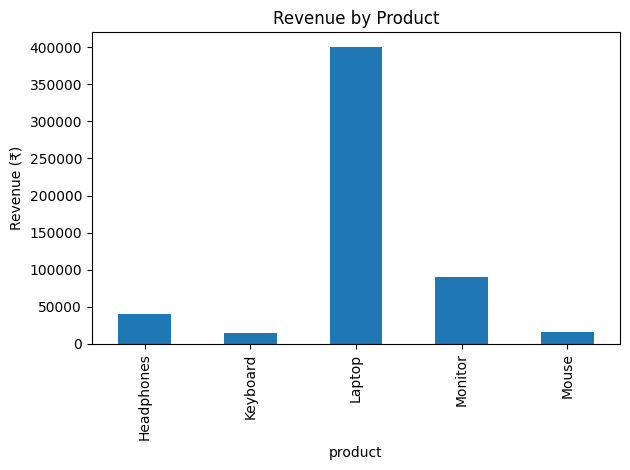

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create table (if not exists)
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')

# Insert sample data
data = [
    ('Laptop', 4, 50000),
    ('Mouse', 10, 800),
    ('Keyboard', 6, 1200),
    ('Monitor', 3, 15000),
    ('Headphones', 8, 2500)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?)", data)
conn.commit()

# Run query
query = '''
SELECT product, SUM(quantity) AS total_qty, SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
print(df)

# Plot
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel("Revenue (₹)")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

conn.close()
